In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [22]:
data = pd.read_csv('diabetes.csv')

In [23]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [25]:
data.size

6912

In [26]:
print(data.isnull().sum())

# Handle missing values by replacing them with the median of the column (if any)
data.fillna(data.median(), inplace=True)

# Separate features and target variable
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Target variable


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [27]:
# Split dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [29]:
# Normalize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train Random Forest Classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_scaled, y_train)



RandomForestClassifier(random_state=42)

In [30]:
# Initialize and train Support Vector Classifier (SVC)
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(random_state=42)

In [31]:
# Make predictions with both models
rf_pred = rf.predict(X_test_scaled)
svc_pred = svc.predict(X_test_scaled)

In [33]:
# Evaluate Random Forest model
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, rf_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, rf_pred):.4f}")
print(f"Precision: {precision_score(y_test, rf_pred):.4f}")
print(f"Recall: {recall_score(y_test, rf_pred):.4f}")
print("\nRandom Forest Confusion Matrix:\n", confusion_matrix(y_test, rf_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_pred))

# Evaluate SVC model
print("\nSVC Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, svc_pred):.4f}")
print(f"F1 Score: {f1_score(y_test, svc_pred):.4f}")
print(f"Precision: {precision_score(y_test, svc_pred):.4f}")
print(f"Recall: {recall_score(y_test, svc_pred):.4f}")
print("\nSVC Confusion Matrix:\n", confusion_matrix(y_test, svc_pred))
print("\nSVC Classification Report:\n", classification_report(y_test, svc_pred))



Random Forest Model Evaluation:
Accuracy: 0.7208
F1 Score: 0.6126
Precision: 0.6071
Recall: 0.6182

Random Forest Confusion Matrix:
 [[77 22]
 [21 34]]

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154


SVC Model Evaluation:
Accuracy: 0.7338
F1 Score: 0.6019
Precision: 0.6458
Recall: 0.5636

SVC Confusion Matrix:
 [[82 17]
 [24 31]]

SVC Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73    

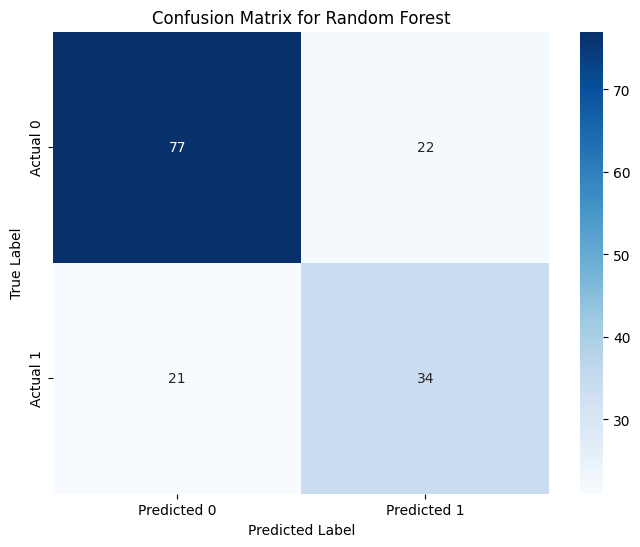

In [38]:
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

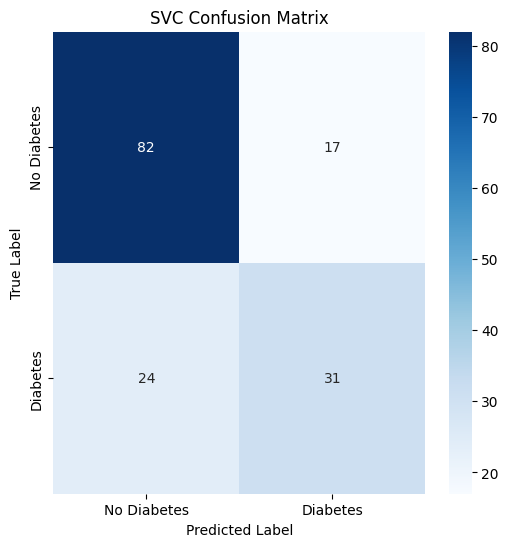

In [37]:
cm_svc = confusion_matrix(y_test, svc_pred)

# Plotting the SVC confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm_svc, annot=True, fmt="d", cmap="Blues",
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])
plt.title('SVC Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()